Loading MNIST dataset...
Training data shape: (60000, 784)
Test data shape: (10000, 784)
Creating binary autoencoder model...


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141,296 (4.35 MB)

 Trainable params: 1,141,296 (4.35 MB)

 Non-trainable params: 0 (0.00 B)


Training the autoencoder...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.2905 - mse: 0.0956 - val_loss: 0.1338 - val_mse: 0.0422
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.1250 - mse: 0.0393 - val_loss: 0.1031 - val_mse: 0.0320
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 0.1007 - mse: 0.0312 - val_loss: 0.0903 - val_mse: 0.0277
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0890 - mse: 0.0274 - val_loss: 0.0822 - val_mse: 0.0252
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0815 - mse: 0.0249 - val_loss: 0.0763 - val_mse: 0.0233
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0754 - mse: 0.0230 - val_loss: 0.0723 - val_mse: 0.0220
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0707 - mse: 0.0215 - val_loss: 0.0692 - val_mse: 0.0210
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0675 - mse: 0.0204 - val_loss: 0.0675 - val_mse: 0.0204
Epoch 9/50


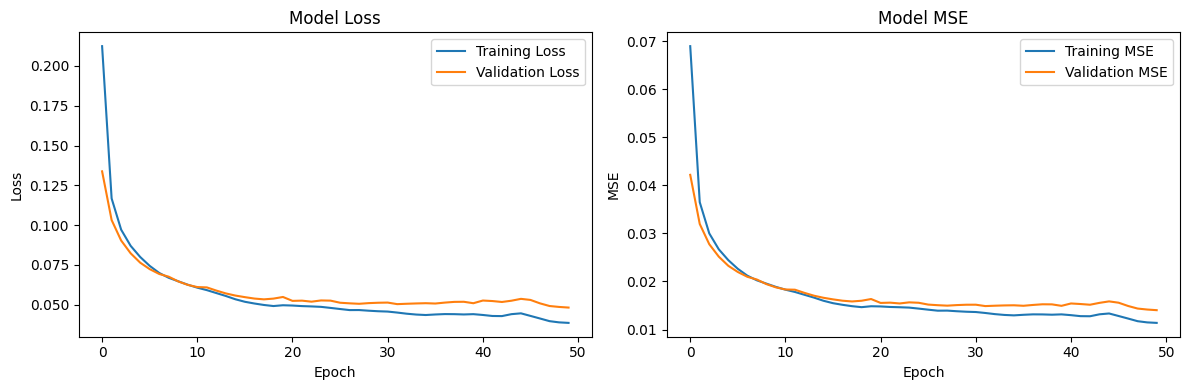


Testing the autoencoder...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


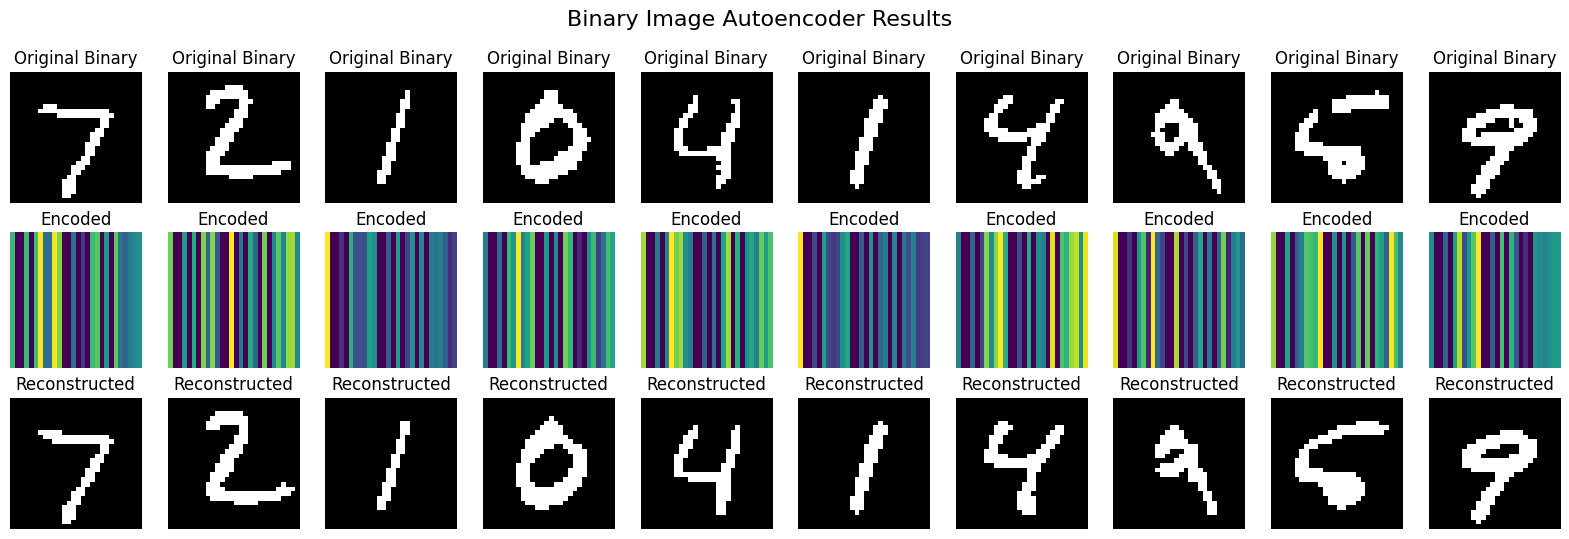


Mean Reconstruction Error: 0.014021
Latent space dimensions: 32
Compression ratio: 24.50x
Original image size: 784 pixels
Compressed size: 32 values


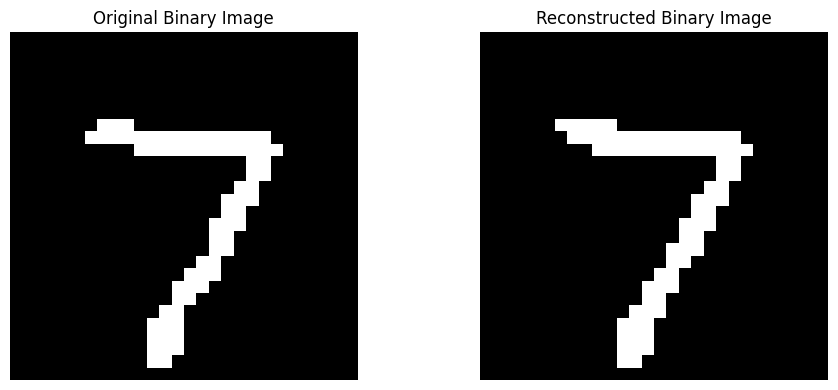

Binary Image Autoencoder training completed!


In [2]:
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import binarize

# Setting random seed for reproducability
np.random.seed(42)
tf.random.set_seed(42)

# Using the MNIST dataset
print("Loading MNIST dataset...")
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Binarized the images (threshold at 0.5)
x_train_binary = (x_train > 0.5).astype('float32')
x_test_binary = (x_test > 0.5).astype('float32')

x_train_flat = x_train_binary.reshape(x_train_binary.shape[0], 28*28)
x_test_flat = x_test_binary.reshape(x_test_binary.shape[0], 28*28)

print(f"Training data shape: {x_train_flat.shape}")
print(f"Test data shape: {x_test_flat.shape}")

# Binary Autoencoder class
class BinaryAutoencoder(Model):
    def __init__(self, latent_dim=32):
        super(BinaryAutoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Encoder layers
        self.encoder_layers = [
            layers.Dense(512, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(latent_dim, activation='relu')
        ]

        # Decoder layers
        self.decoder_layers = [
            layers.Dense(128, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(512, activation='relu'),
            layers.Dense(784, activation='sigmoid')  # 28*28 = 784
        ]

    def call(self, x):
        encoded = x
        for layer in self.encoder_layers:
            encoded = layer(encoded)

        decoded = encoded
        for layer in self.decoder_layers:
            decoded = layer(decoded)

        return decoded

# Alternative: Functional API implementation
def create_binary_autoencoder(input_dim=784, latent_dim=32):
    input_img = keras.Input(shape=(input_dim,))

    encoded = layers.Dense(512, activation='relu')(input_img)
    encoded = layers.Dense(256, activation='relu')(encoded)
    encoded = layers.Dense(128, activation='relu')(encoded)
    encoded = layers.Dense(latent_dim, activation='relu')(encoded)

    decoded = layers.Dense(128, activation='relu')(encoded)
    decoded = layers.Dense(256, activation='relu')(decoded)
    decoded = layers.Dense(512, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

    # autoencoder model
    autoencoder = Model(input_img, decoded)

    # encoder model for visualization
    encoder = Model(input_img, encoded)

    return autoencoder, encoder

# Create the model
print("Creating binary autoencoder model...")
latent_dimensions = 32
autoencoder, encoder = create_binary_autoencoder(input_dim=784, latent_dim=latent_dimensions)

# Compile the model
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Better for binary data
    metrics=['mse']
)

autoencoder.summary()

print("\nTraining the autoencoder...")
history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat),
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

# Test the autoencoder
print("\nTesting the autoencoder...")
encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = autoencoder.predict(x_test_flat)

# Visualize results
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original binary images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_binary[i].reshape(28, 28), cmap='gray')
    plt.title("Original Binary")
    plt.axis('off')

    # Encoded representation (show first 28 dimensions)
    ax = plt.subplot(3, n, i + 1 + n)
    encoded_reshaped = encoded_imgs[i][:28].reshape(1, 28)
    plt.imshow(encoded_reshaped, cmap='viridis', aspect='auto')
    plt.title("Encoded")
    plt.axis('off')

    # Reconstructed binary images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    reconstructed = (decoded_imgs[i] > 0.5).astype('float32')  # Binarize output
    plt.imshow(reconstructed.reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.suptitle('Binary Image Autoencoder Results', fontsize=16)
plt.show()

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(x_test_flat - decoded_imgs))
print(f"\nMean Reconstruction Error: {reconstruction_error:.6f}")

# Show some statistics
print(f"Latent space dimensions: {latent_dimensions}")
print(f"Compression ratio: {784/latent_dimensions:.2f}x")
print(f"Original image size: 784 pixels")
print(f"Compressed size: {latent_dimensions} values")

# Function to encode and decode new images
def encode_decode_image(image):
    """Encode and decode a single 28x28 binary image"""
    img_flat = image.flatten().reshape(1, -1)

    encoded = encoder.predict(img_flat, verbose=0)

    decoded = autoencoder.predict(img_flat, verbose=0)

    return encoded, decoded.reshape(28, 28)

test_idx = 0
test_image = x_test_binary[test_idx]
encoded_result, decoded_result = encode_decode_image(test_image)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow((decoded_result > 0.5).astype('float32'), cmap='gray')
plt.title('Reconstructed Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Binary Image Autoencoder training completed!")
